# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

## Get the list of stocks in the S&P 500 

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [4]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [5]:
ticker_list = df_tickers['Symbol'].tolist()

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [ ]:
start_date = '2024-05-01'
end_date = '2025-05-01'
data = yf.download(ticker_list, start=start_date, end=end_date)
display(data.head())

C:\Users\hille\AppData\Local\Temp\ipykernel_8340\1244155057.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_list, start=start_date, end=end_date)
[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')


Price      Adj Close             Close                                      \
Ticker          BF.B BRK.B           A        AAPL        ABBV        ABNB   
Date                                                                         
2024-05-01       NaN   NaN  137.376282  168.283676  154.714767  156.160004   
2024-05-02       NaN   NaN  136.217361  171.991287  153.844193  158.330002   
2024-05-03       NaN   NaN  138.129074  182.279144  156.695099  159.710007   
2024-05-06       NaN   NaN  139.278091  180.619186  155.681030  162.000000   
2024-05-07       NaN   NaN  139.931839  181.305038  155.508820  159.809998   

Price                                                      ...   Volume  \
Ticker             ABT       ACGL         ACN        ADBE  ...       WY   
Date                                                       ...            
2024-05-01  103.735451  91.096085  293.442108  469.390015  ...  4225200   
2024-05-02  103.374344  90.497009  295.092773  476.570007  ...  4710500   
2024-05-03  103.354836  89.774330  298.403870  486.179993  ...  4582700   
2024-05-06  103.101067  92.370285  300.712860  493.589996  ...  1962600   
2024-05-07  103.618340  93.387741  305.232452  492.269989  ...  2935200   

Price                                                                        \
Ticker         WYNN      XEL       XOM      XYL       XYZ      YUM      ZBH   
Date                                                                          
2024-05-01  1846900  4589600  27777700  1773900  22145700  4639900  2710500   
2024-05-02  1873200  3910500  25513600  2784800  17693800  2425400  2931700   
2024-05-03  1323200  3285100  28023300  1418000  28948300  2452500  1847600   
2024-05-06  1906700  4816700  31401300   953500  11675500  2295500  1293800   
2024-05-07  2967600  4676300  30122000  1307600   6609800  1922600  1358500   

Price                        
Ticker        ZBRA      ZTS  
Date                         
2024-05-01  580100  3779100  
2024-05-02  507800  5323100  
2024-05-03  475200  3007000  
2024-05-06  334100  3081300  
2024-05-07  275000  3337500  

[5 rows x 2517 columns]

In [ ]:
# Load closing prices
df_close = data['Close']
# Make sure you end this coding section by displaying your results: display(df_close)
display(df_close.head())

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376282,168.283676,154.714767,156.160004,103.735451,91.096085,293.442108,469.390015,189.859955,55.668907,...,29.172792,91.453217,51.484390,111.217079,129.094421,66.839996,132.078339,118.202553,309.049988,156.223297
2024-05-02,136.217361,171.991287,153.844193,158.330002,103.374344,90.497009,295.092773,476.570007,192.405899,56.603558,...,29.955242,93.958229,51.493958,111.418373,134.052750,70.300003,131.824631,117.115044,312.709991,164.827881
2024-05-03,138.129074,182.279144,156.695099,159.710007,103.354836,89.774330,298.403870,486.179993,195.480637,56.431885,...,30.032518,95.378410,51.934326,111.188332,135.255356,69.470001,131.112122,120.278725,309.589996,164.670197
2024-05-06,139.278091,180.619186,155.681030,162.000000,103.101067,92.370285,300.712860,493.589996,199.093948,57.404682,...,30.022860,96.522446,52.039635,111.907219,137.217010,73.529999,132.907913,119.191200,315.790009,163.566284
2024-05-07,139.931839,181.305038,155.508820,159.809998,103.618340,93.387741,305.232452,492.269989,199.338730,58.739899,...,29.800684,95.891251,52.671459,111.351273,138.035187,71.599998,132.644424,120.051315,317.869995,166.030365


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [9]:
df_ma50 = df_close.rolling(window=50).mean()
df_ma200 = df_close.rolling(window=200).mean()

In [10]:
display(df_ma50.tail())
display(df_ma200.tail())

# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,118.589775,219.229514,194.882048,128.497001,129.695852,91.7206,322.755805,401.392800,204.386194,46.354729,...,28.290148,82.616266,68.725403,109.007224,120.092335,60.865000,151.386326,105.303733,277.851799,158.931156
2025-04-25,117.960954,218.678437,194.779480,128.136801,129.675178,91.7690,320.885378,399.492000,204.194041,46.424616,...,28.199398,82.695181,68.768236,109.031401,119.825021,60.367001,151.415763,105.358225,275.718199,158.535974
2025-04-28,117.376370,218.051459,194.792594,127.782001,129.642279,91.7896,318.998219,397.680000,203.901112,46.480952,...,28.121558,82.734114,68.802902,109.041310,119.530667,59.847600,151.409784,105.399390,274.119598,158.320587
2025-04-29,116.839012,217.384534,194.840304,127.063401,129.652079,91.8734,317.245909,395.896400,203.482810,46.524306,...,28.049857,82.593967,68.855058,109.043688,119.324127,59.358801,151.419251,105.448960,272.873398,158.289487
2025-04-30,116.293892,216.745971,194.853134,126.289801,129.675380,91.9204,315.515956,394.113801,202.998097,46.560732,...,27.978171,82.381536,68.909186,108.954311,119.126358,58.844601,151.498900,105.470672,271.258199,158.298382


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,133.080366,227.101211,183.261853,130.701575,116.973860,96.197872,340.475851,478.509449,214.891999,52.358255,...,29.730782,85.165791,64.041626,111.437774,125.549300,72.28710,136.723923,106.728763,346.199799,172.881444
2025-04-25,132.988336,227.008163,183.380334,130.551875,117.119245,96.185332,340.478538,477.517949,214.720083,52.293548,...,29.719768,85.156247,64.130068,111.439661,125.467794,72.25500,136.835707,106.711043,345.854800,172.787551
2025-04-28,132.891064,226.898010,183.529515,130.409175,117.261134,96.177719,340.493396,476.538299,214.512770,52.222563,...,29.712475,85.151355,64.220807,111.437109,125.371802,72.22490,136.937422,106.688921,345.453200,172.697852
2025-04-29,132.778128,226.820123,183.676030,130.306625,117.402337,96.178483,340.515407,475.605049,214.322793,52.150146,...,29.699563,85.139760,64.309746,111.426794,125.281706,72.19025,137.037122,106.665544,345.091850,172.596477
2025-04-30,132.658895,226.733898,183.828657,130.182325,117.544590,96.173074,340.478450,474.684699,214.120323,52.077435,...,29.685689,85.115950,64.397867,111.402857,125.198611,72.13890,137.141726,106.640988,344.717500,172.493530


### Detecting Golden and Death Crosses in the last 14 days

In [25]:
def get_crosses(recent_dates):
    list_golden_crosses = []
    list_death_crosses = []

    for ticker in df_ma50.columns:
            ma50 = df_ma50[ticker].loc[recent_dates]
            ma200 = df_ma200[ticker].loc[recent_dates]
            if ma50.isnull().all() or ma200.isnull().all():
                continue
            for i in range(1, len(recent_dates)):
                prev_50 = ma50.iloc[i-1]
                prev_200 = ma200.iloc[i-1]
                curr_50 = ma50.iloc[i]
                curr_200 = ma200.iloc[i]
                if pd.isnull(prev_50) or pd.isnull(prev_200) or pd.isnull(curr_50) or pd.isnull(curr_200):
                    continue
                if curr_50 > curr_200 and prev_50 <= prev_200:
                    list_golden_crosses.append({'ticker': ticker, 'date': recent_dates[i]})
                elif curr_50 < curr_200 and prev_50 >= prev_200:
                    list_death_crosses.append({'ticker': ticker, 'date': recent_dates[i]})
    return pd.DataFrame(list_golden_crosses), pd.DataFrame(list_death_crosses)

last_14_days = df_ma50.index[-14:]
df_golden_cross_14d, df_death_cross_14d = get_crosses(last_14_days)

In [28]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)
display(df_golden_cross_14d)

,ticker,date
0,AMT,2025-04-21
1,CI,2025-04-30
2,EW,2025-04-17
3,INVH,2025-04-30
4,KDP,2025-04-21
5,MDLZ,2025-04-28
6,MOH,2025-04-28
7,NEM,2025-04-14
8,SBAC,2025-04-29
9,SJM,2025-04-25


In [29]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)
display(df_death_cross_14d)

,ticker,date
0,ADSK,2025-04-11
1,AME,2025-04-22
2,AMP,2025-04-24
3,AMZN,2025-04-22
4,APD,2025-04-21
5,APO,2025-04-17
6,AXP,2025-04-22
7,BAC,2025-04-16
8,BLK,2025-04-16
9,CCL,2025-04-22


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [39]:
df_top10_golden_cross_14d = df_golden_cross_14d.sort_values(by='ticker').head(10)
display(df_top10_golden_cross_14d)

,ticker,date
0,AMT,2025-04-21
1,CI,2025-04-30
2,EW,2025-04-17
3,INVH,2025-04-30
4,KDP,2025-04-21
5,MDLZ,2025-04-28
6,MOH,2025-04-28
7,NEM,2025-04-14
8,SBAC,2025-04-29
9,SJM,2025-04-25


#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days: 

In [40]:
df_top10_death_cross_14d = df_death_cross_14d.sort_values(by='ticker').head(10)
display(df_top10_death_cross_14d)

,ticker,date
0,ADSK,2025-04-11
1,AME,2025-04-22
2,AMP,2025-04-24
3,AMZN,2025-04-22
4,APD,2025-04-21
5,APO,2025-04-17
6,AXP,2025-04-22
7,BAC,2025-04-16
8,BLK,2025-04-16
9,CCL,2025-04-22


### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot 

In [38]:
# Annualized volatility
df_volatility = df_close.pct_change().std() * np.sqrt(252)
df_volatility = df_volatility.sort_index()
display(df_volatility.head(10))

C:\Users\hille\AppData\Local\Temp\ipykernel_8340\1837483330.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_volatility = df_close.pct_change().std() * np.sqrt(252)


Ticker
A       0.295188
AAPL    0.326746
ABBV    0.270621
ABNB    0.413837
ABT     0.206291
ACGL    0.258280
ACN     0.267931
ADBE    0.371113
ADI     0.423463
ADM     0.267831
dtype: float64

#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

In [ ]:
def create_ma_df(ticker):
    if ticker not in df_ma50.columns or ticker not in df_ma200.columns or ticker not in df_close.columns:
        raise ValueError(f"Ticker {ticker} not found in the data.")
    
    df_to_plot = pd.DataFrame({
        'MA_50': df_ma50[ticker],
        'MA_200': df_ma200[ticker],
        'Price': df_close[ticker]
    })

    # Last 14 days of data
    return df_to_plot.tail(14)

In [ ]:
# Function to plot the crosses in a grid of subplots
def plot_crosses(df_top10, cross_type):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))
    axes = axes.flatten()

    for i, (index, row) in enumerate(df_top10.iterrows()):
        ticker = row['ticker']
        cross_date = row['date']
        ticker_data = create_ma_df(ticker)
        volatility = df_volatility[ticker]

        ax = axes[i]
        ax.plot(ticker_data.index, ticker_data['Price'], label='Price', color='blue')
        ax.plot(ticker_data.index, ticker_data['MA_50'], label='MA 50', color='orange')
        ax.plot(ticker_data.index, ticker_data['MA_200'], label='MA 200', color='red')
        cross_date_timestamp = pd.Timestamp(cross_date)
        ax.axvline(cross_date_timestamp, color='green', linestyle=':', linewidth=2, label=cross_type)
        xticks = [ticker_data.index[0], cross_date_timestamp, ticker_data.index[-1]]
        xtick_labels = [ticker_data.index[0].strftime('%Y-%m-%d'), cross_date_timestamp.strftime('%Y-%m-%d'), ticker_data.index[-1].strftime('%Y-%m-%d')]
        ax.set_xticks(xticks)
        ax.set_xticklabels(xtick_labels)
        ax.set_title(f'{ticker} {cross_type} - Volatility: {volatility:.2%}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
        ax.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


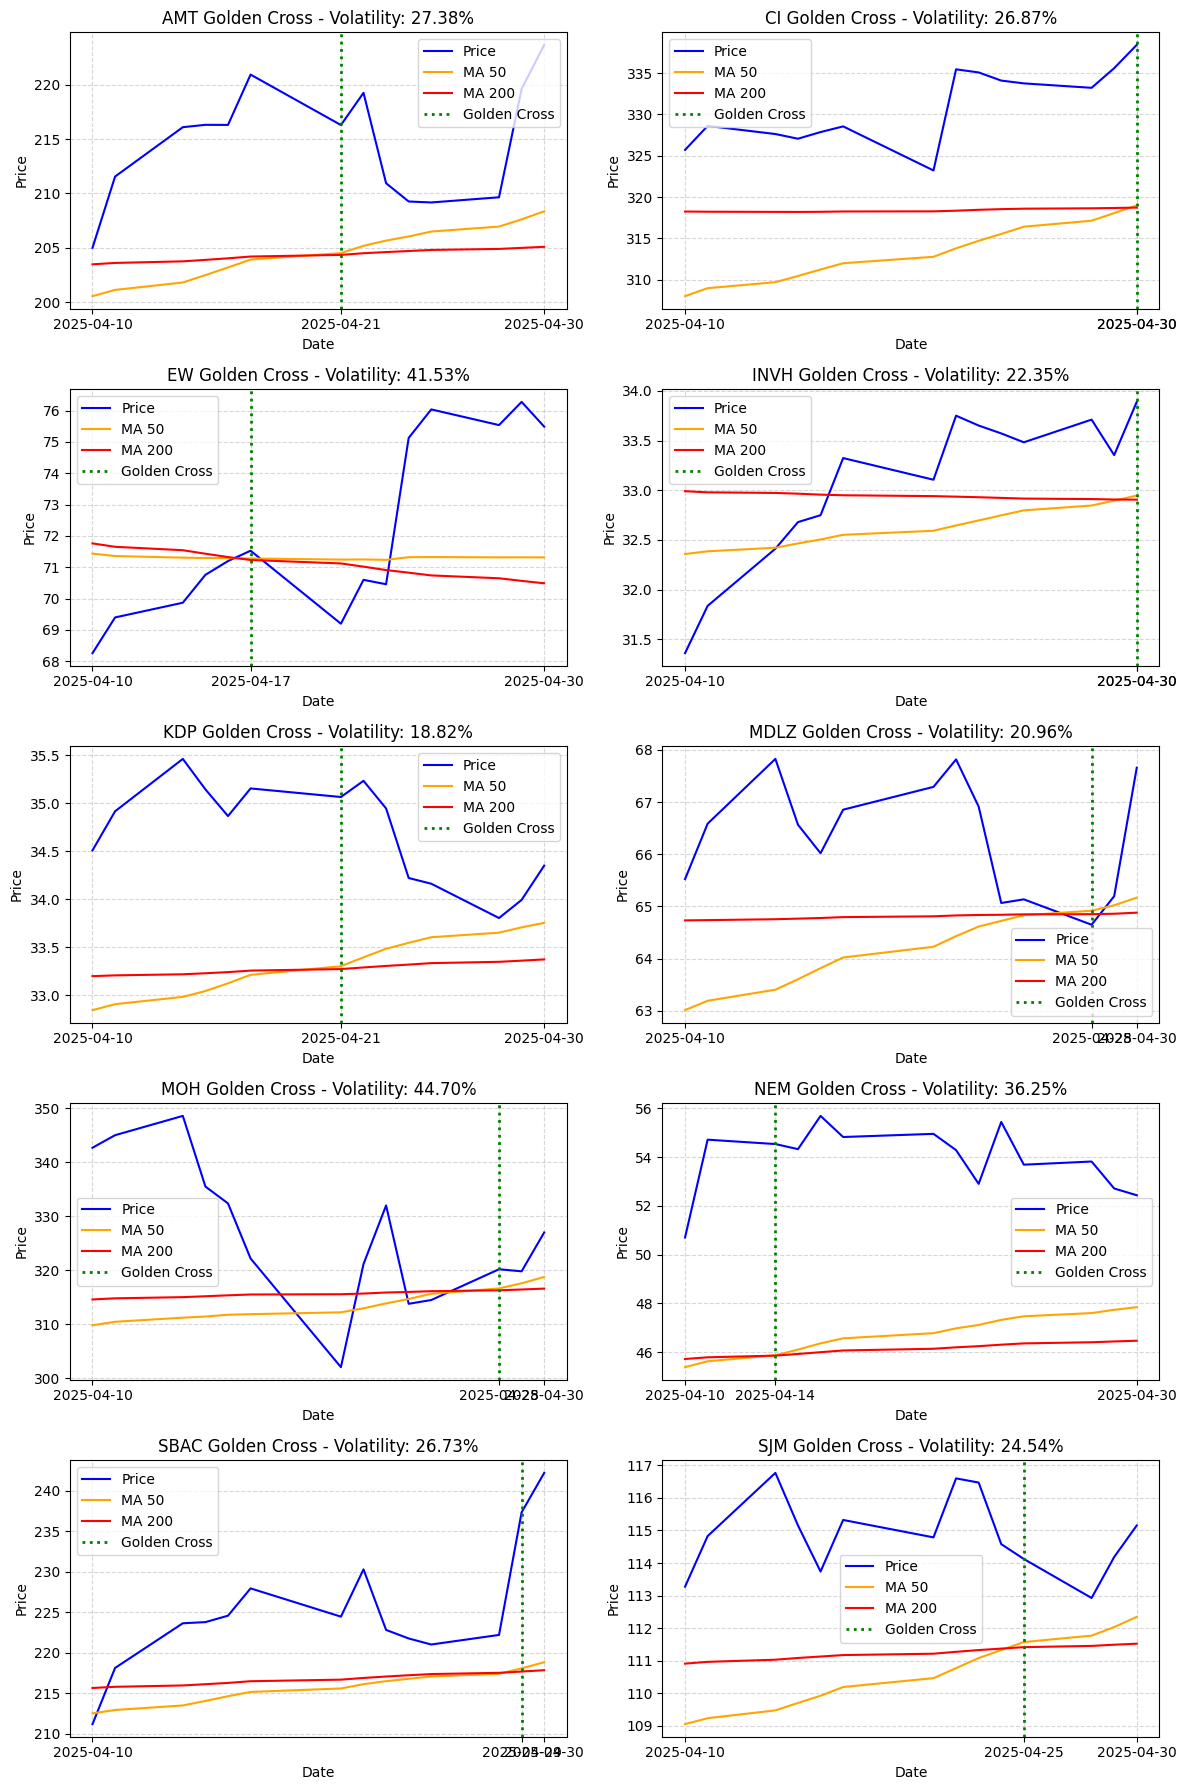

In [56]:
plot_crosses(df_top10_golden_cross_14d, 'Golden Cross')

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

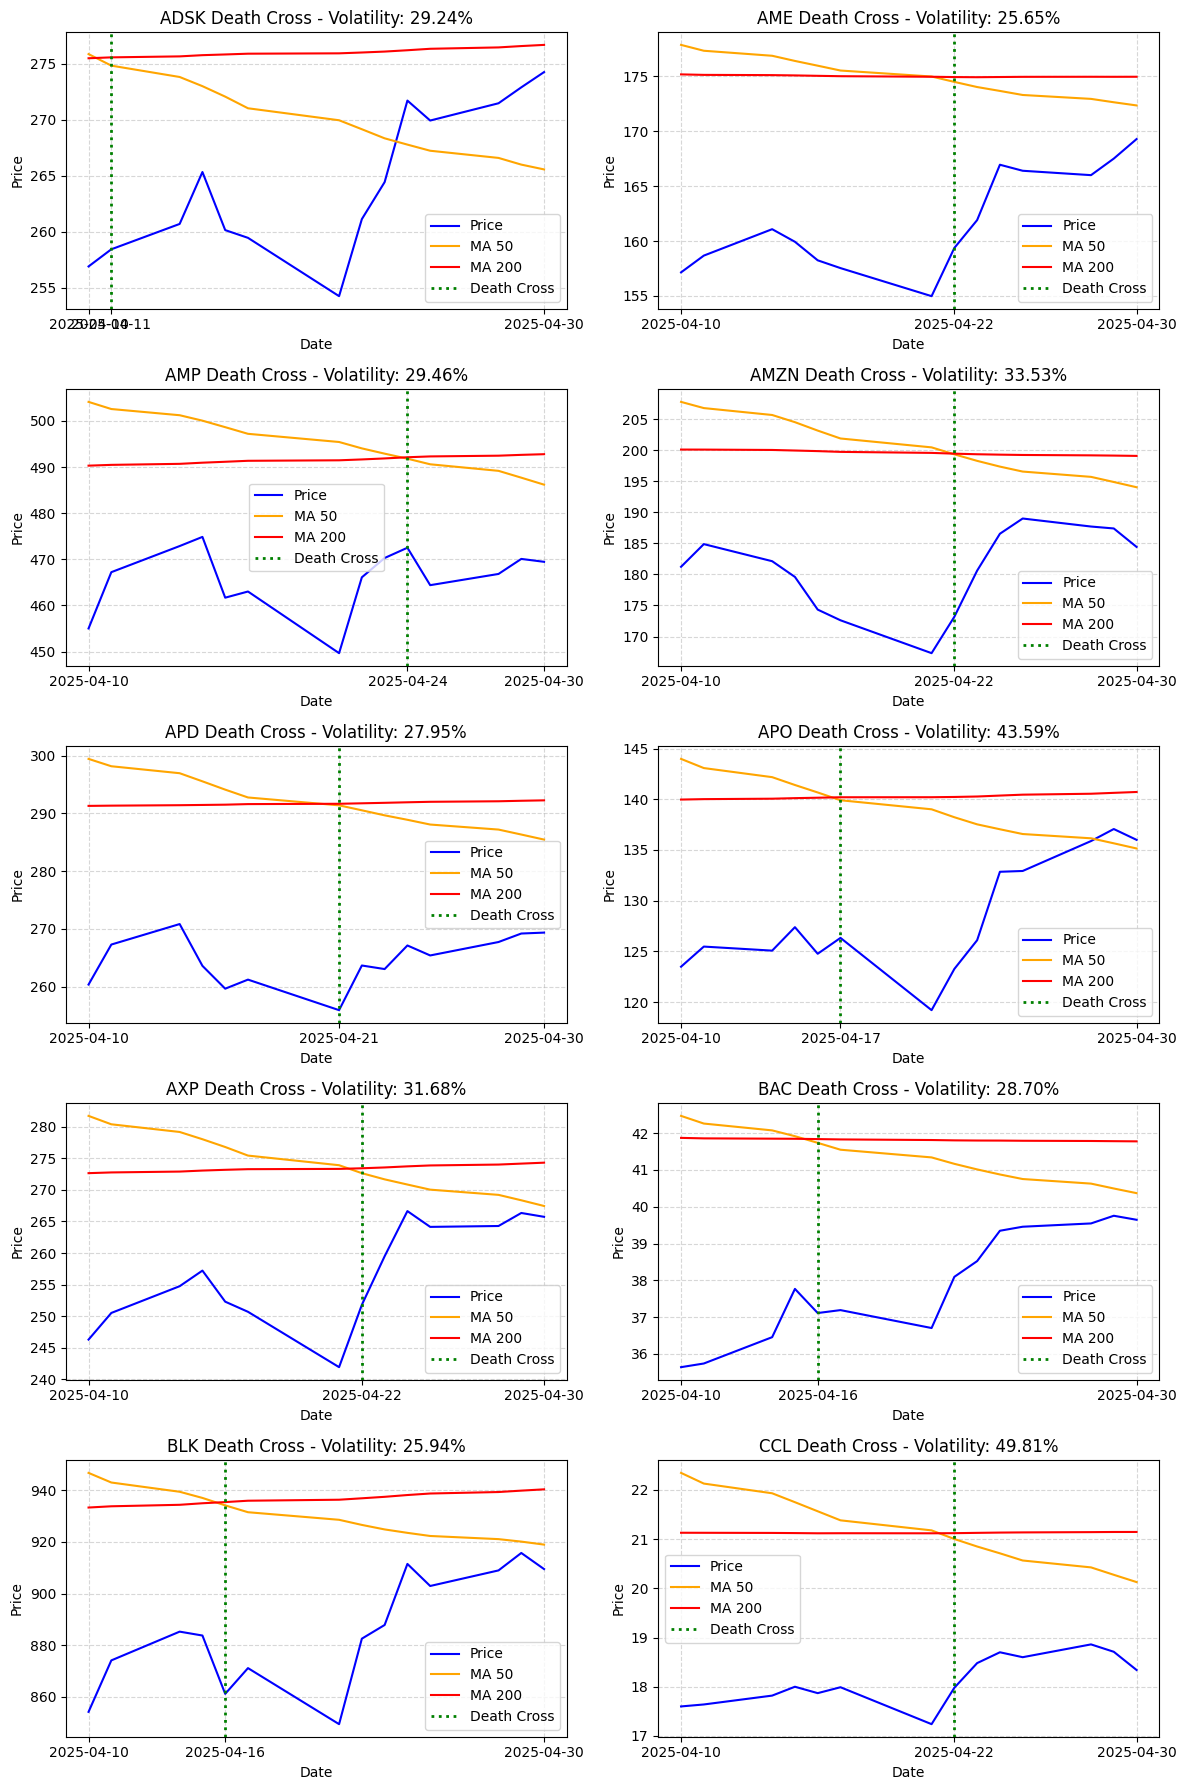

In [57]:
plot_crosses(df_top10_death_cross_14d, 'Death Cross')

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

The golden cross is a technical analysis pattern that occurs when a short-term moving average crosses above a long-term moving average, indicating a potential bullish trend. It is often seen as a buy signal by traders. The usual moving averages used are the 50-day and 200-day moving averages.


#### What is a Death Cross and how might market participants react to it?

The death cross is also a technical analysis pattern that occurs when a short-term moving average crosses below a long-term moving average, indicating a potential bearish trend. It is often seen as a sell signal by traders. The usual moving averages are also the 50-day and 200-day moving averages.



#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

Because they smooth out price data to identify the direction of the trend over a specific period. They help traders to see the overall trend and potential reversal points in the market.



#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

YOUR WRITTEN RESPONSE HERE



#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

YOUR WRITTEN RESPONSE HERE


### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

YOUR WRITTEN RESPONSE HERE


#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

YOUR WRITTEN RESPONSE HERE

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

YOUR WRITTEN RESPONSE HERE


### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

YOUR WRITTEN RESPONSE HERE


### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

YOUR WRITTEN RESPONSE HERE


#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?


YOUR WRITTEN RESPONSE HERE



#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

YOUR WRITTEN RESPONSE HERE


Caveats in 2 or 3 bullet points: 

YOUR WRITTEN REPSONSE HERE